In [2]:
import pandas as pd
import os

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import vapeplot

import warnings
warnings.filterwarnings('ignore')

vapeplot.set_palette('cool')
plt.rc('axes', grid=False, facecolor="white")
plt.rcParams.update({'font.size': 18})

In [4]:
list_dfs = []

list_files = os.listdir("../../results/results_training_expression/")

for element in list_files:
    df_data = pd.read_csv(f"../../results/results_training_expression/{element}")
    values_in_name = element.split("_exploring_")
    encoder = values_in_name[0]
    iteration = values_in_name[-1].replace(".csv", "")

    df_data["encoder"] = encoder
    list_dfs.append(df_data)

df_exploring = pd.concat(list_dfs, axis=0)
df_exploring

,description,r2_value,mean_abs_error_value,mean_square_error_value,fit_time,score_time,test_max_error,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_median_absolute_error,test_neg_root_mean_squared_error,test_r2,iteration,encoder
0,KernelRidge,0.000880,0.254726,0.276491,0.689024,0.081147,-0.459839,-0.250864,-0.075006,-0.283584,-0.273862,-0.000450,22,word2vec
1,GaussianProcessRegressor,0.566157,0.147504,0.182196,5.700396,1.606097,-0.600923,-0.151607,-0.035558,-0.129591,-0.188531,0.525419,22,word2vec
2,BayesianRidge,0.352657,0.186683,0.222556,0.307080,0.004556,-0.612359,-0.186045,-0.049154,-0.171153,-0.221689,0.344240,22,word2vec
3,TweedieRegressor,-0.000057,0.254858,0.276620,0.010225,0.004490,-0.459937,-0.250954,-0.075056,-0.283718,-0.273953,-0.001119,22,word2vec
4,SGDRegressor,-0.000393,0.255112,0.276667,0.037852,0.004607,-0.461851,-0.251002,-0.075039,-0.284051,-0.273922,-0.000893,22,word2vec
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11,BaggingRegressor,0.367314,0.157196,0.217291,5.760560,0.027244,-0.704563,-0.160489,-0.049640,-0.105986,-0.222634,0.344767,29,Group_7
12,DecisionTreeRegressor,0.170866,0.172675,0.248748,0.892161,0.005919,-0.776366,-0.177766,-0.065830,-0.101737,-0.256495,0.130994,29,Group_7
13,SVR,0.164553,0.223157,0.249694,1.303209,0.596503,-0.502100,-0.227583,-0.064091,-0.238672,-0.253139,0.153995,29,Group_7
14,KNeighborsRegressor,0.443688,0.156181,0.203755,0.007773,0.085843,-0.684143,-0.159299,-0.043057,-0.125120,-0.207470,0.431327,29,Group_7


In [5]:
df_exploring_validating = df_exploring[["description", "r2_value", "mean_abs_error_value", "mean_square_error_value", "iteration", "encoder"]]
df_exploring_validating["stage"] = "Validation"
df_exploring_validating = df_exploring_validating[df_exploring_validating["r2_value"]>0]
df_exploring_validating

,description,r2_value,mean_abs_error_value,mean_square_error_value,iteration,encoder,stage
0,KernelRidge,0.000880,0.254726,0.276491,22,word2vec,Validation
1,GaussianProcessRegressor,0.566157,0.147504,0.182196,22,word2vec,Validation
2,BayesianRidge,0.352657,0.186683,0.222556,22,word2vec,Validation
6,GradientBoostingRegressor,0.314626,0.201014,0.229000,22,word2vec,Validation
7,HistGradientBoostingRegressor,0.408364,0.180886,0.212765,22,word2vec,Validation
...,...,...,...,...,...,...,...
11,BaggingRegressor,0.367314,0.157196,0.217291,29,Group_7,Validation
12,DecisionTreeRegressor,0.170866,0.172675,0.248748,29,Group_7,Validation
13,SVR,0.164553,0.223157,0.249694,29,Group_7,Validation
14,KNeighborsRegressor,0.443688,0.156181,0.203755,29,Group_7,Validation


In [6]:
df_exploring_training = df_exploring[["description", 'test_r2', "iteration", "encoder"]]
df_exploring_training.columns = ["description", 'r2_value', "iteration", "encoder"]
df_exploring_training["stage"] = "Training"
df_exploring_training = df_exploring_training[df_exploring_training["r2_value"]>0]
df_exploring_training

,description,r2_value,iteration,encoder,stage
1,GaussianProcessRegressor,0.525419,22,word2vec,Training
2,BayesianRidge,0.344240,22,word2vec,Training
6,GradientBoostingRegressor,0.275216,22,word2vec,Training
7,HistGradientBoostingRegressor,0.376191,22,word2vec,Training
8,AdaBoostRegressor,0.117301,22,word2vec,Training
...,...,...,...,...,...
11,BaggingRegressor,0.344767,29,Group_7,Training
12,DecisionTreeRegressor,0.130994,29,Group_7,Training
13,SVR,0.153995,29,Group_7,Training
14,KNeighborsRegressor,0.431327,29,Group_7,Training


In [7]:
df_concat = pd.concat([df_exploring_training, df_exploring_validating], axis=0)
df_concat = df_concat[["description", "r2_value","iteration", "encoder", "stage"]]
df_concat

,description,r2_value,iteration,encoder,stage
1,GaussianProcessRegressor,0.525419,22,word2vec,Training
2,BayesianRidge,0.344240,22,word2vec,Training
6,GradientBoostingRegressor,0.275216,22,word2vec,Training
7,HistGradientBoostingRegressor,0.376191,22,word2vec,Training
8,AdaBoostRegressor,0.117301,22,word2vec,Training
...,...,...,...,...,...
11,BaggingRegressor,0.367314,29,Group_7,Validation
12,DecisionTreeRegressor,0.170866,29,Group_7,Validation
13,SVR,0.164553,29,Group_7,Validation
14,KNeighborsRegressor,0.443688,29,Group_7,Validation


<Axes: xlabel='r2_value', ylabel='encoder'>

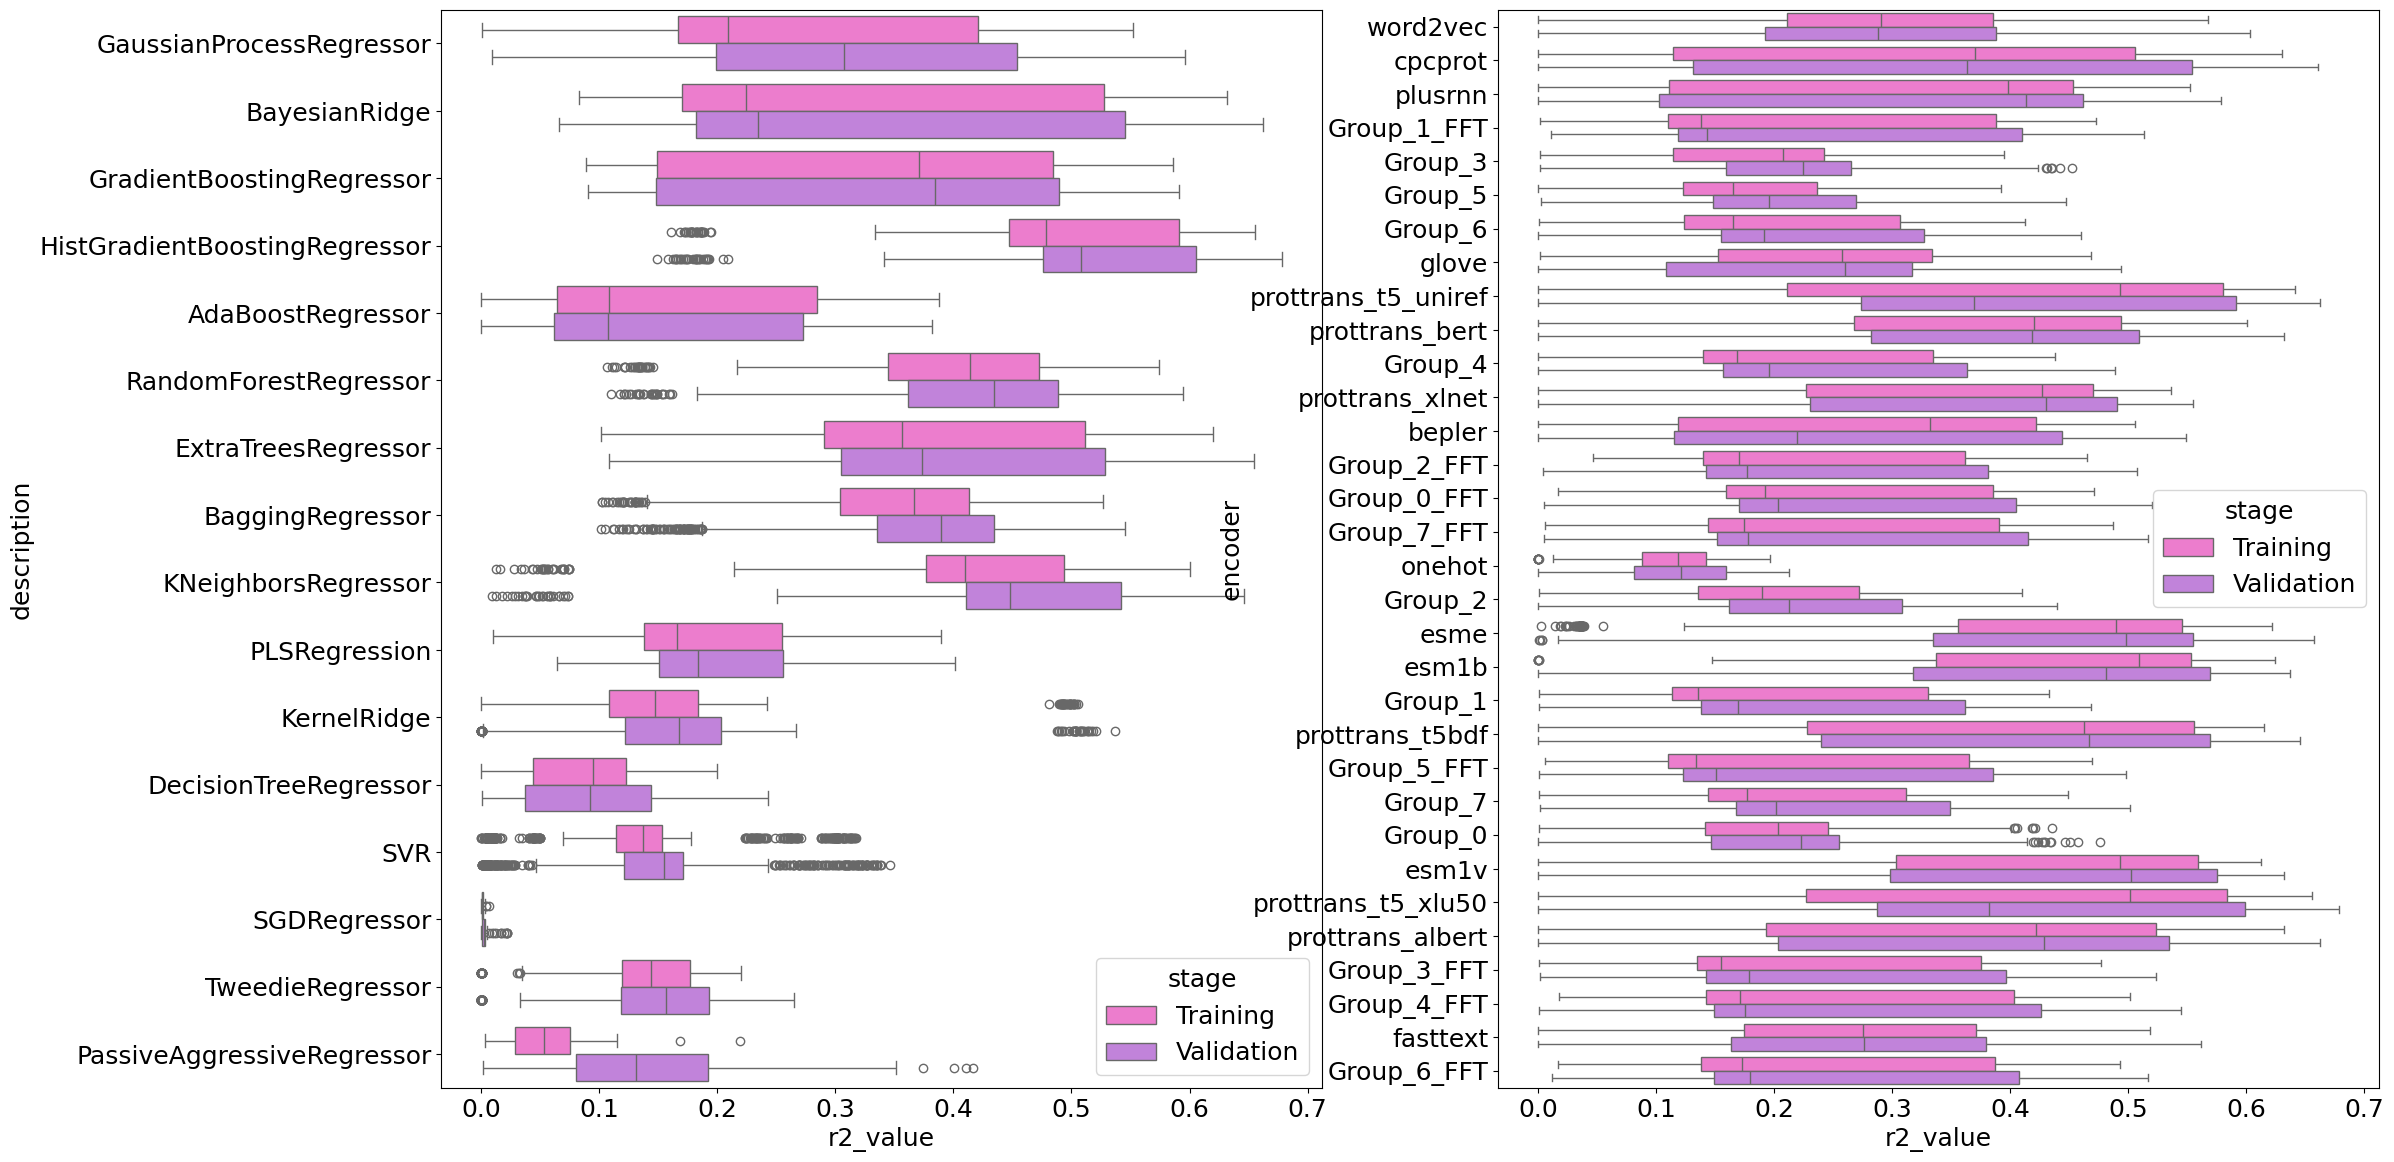

In [8]:
fig, axes = plt.subplots(1,2, figsize=(25,14))

sns.boxplot(ax=axes[0], data=df_concat, x="r2_value", hue="stage", y="description")
sns.boxplot(ax=axes[1], data=df_concat, x="r2_value", hue="stage", y="encoder")

In [9]:
df_exploring_training.sort_values(by="r2_value", ascending=False)

,description,r2_value,iteration,encoder,stage
7,HistGradientBoostingRegressor,6.556096e-01,10,prottrans_t5_xlu50,Training
7,HistGradientBoostingRegressor,6.445757e-01,17,prottrans_t5_xlu50,Training
7,HistGradientBoostingRegressor,6.441517e-01,1,prottrans_t5_xlu50,Training
7,HistGradientBoostingRegressor,6.423972e-01,13,prottrans_t5_xlu50,Training
7,HistGradientBoostingRegressor,6.410752e-01,13,prottrans_t5_uniref,Training
...,...,...,...,...,...
4,SGDRegressor,1.123658e-05,20,plusrnn,Training
0,KernelRidge,4.313999e-06,16,onehot,Training
3,TweedieRegressor,4.181095e-06,18,cpcprot,Training
3,TweedieRegressor,2.116032e-06,27,prottrans_albert,Training


In [10]:
df_exploring_validating.sort_values(by="r2_value", ascending=False)

,description,r2_value,mean_abs_error_value,mean_square_error_value,iteration,encoder,stage
7,HistGradientBoostingRegressor,6.781598e-01,0.121962,0.156925,22,prottrans_t5_xlu50,Validation
7,HistGradientBoostingRegressor,6.661425e-01,0.122553,0.159030,19,prottrans_t5_xlu50,Validation
7,HistGradientBoostingRegressor,6.627751e-01,0.124775,0.160232,23,prottrans_t5_uniref,Validation
2,BayesianRidge,6.623023e-01,0.127588,0.159942,19,prottrans_albert,Validation
7,HistGradientBoostingRegressor,6.619476e-01,0.123994,0.160056,27,prottrans_t5_xlu50,Validation
...,...,...,...,...,...,...,...
4,SGDRegressor,4.850866e-06,0.252722,0.275163,11,glove,Validation
3,TweedieRegressor,4.322386e-06,0.249204,0.273084,10,esm1v,Validation
4,SGDRegressor,2.957662e-06,0.248556,0.272870,18,prottrans_t5bdf,Validation
4,SGDRegressor,1.012305e-06,0.252673,0.275094,17,word2vec,Validation


In [11]:
df_exploring_validating.sort_values(by="mean_abs_error_value", ascending=True)

,description,r2_value,mean_abs_error_value,mean_square_error_value,iteration,encoder,stage
14,KNeighborsRegressor,0.637625,0.120315,0.163695,20,prottrans_t5_uniref,Validation
14,KNeighborsRegressor,0.646222,0.121298,0.164117,23,prottrans_t5_uniref,Validation
14,KNeighborsRegressor,0.627219,0.121761,0.166825,6,prottrans_t5_xlu50,Validation
7,HistGradientBoostingRegressor,0.678160,0.121962,0.156925,22,prottrans_t5_xlu50,Validation
14,KNeighborsRegressor,0.631430,0.121974,0.167931,22,esm1v,Validation
...,...,...,...,...,...,...,...
0,KernelRidge,0.000693,0.255012,0.277512,12,word2vec,Validation
3,TweedieRegressor,0.000760,0.255022,0.277503,12,bepler,Validation
3,TweedieRegressor,0.000665,0.255030,0.277516,12,prottrans_xlnet,Validation
3,TweedieRegressor,0.000015,0.255110,0.277606,12,esm1v,Validation


In [12]:
df_exploring_validating.sort_values(by="mean_square_error_value", ascending=True)

,description,r2_value,mean_abs_error_value,mean_square_error_value,iteration,encoder,stage
7,HistGradientBoostingRegressor,0.678160,0.121962,0.156925,22,prottrans_t5_xlu50,Validation
7,HistGradientBoostingRegressor,0.666142,0.122553,0.159030,19,prottrans_t5_xlu50,Validation
2,BayesianRidge,0.658900,0.127382,0.159366,18,prottrans_albert,Validation
7,HistGradientBoostingRegressor,0.660475,0.125569,0.159479,4,prottrans_t5_uniref,Validation
2,BayesianRidge,0.662302,0.127588,0.159942,19,prottrans_albert,Validation
...,...,...,...,...,...,...,...
3,TweedieRegressor,0.000760,0.255022,0.277503,12,bepler,Validation
0,KernelRidge,0.000693,0.255012,0.277512,12,word2vec,Validation
3,TweedieRegressor,0.000665,0.255030,0.277516,12,prottrans_xlnet,Validation
0,KernelRidge,0.000620,0.254965,0.277522,12,onehot,Validation
